In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug)
clinical_df = pd.read_csv(clinical_trial)

# Combine the data into a single dataset
mouse_clinical = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_clinical.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Group the Drug and Timepoint data
drug_timepoint = mouse_clinical.groupby(['Drug', 'Timepoint'])

# Find the mean of the Tumor Volume
mean_tumor_volume = drug_timepoint['Tumor Volume (mm3)'].mean()

# Convert to a DataFrame by using .reset_index()
tumor_mean = mean_tumor_volume.reset_index()

#Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volumes_sem = drug_timepoint['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumor_sem = tumor_volumes_sem.reset_index()

# Preview DataFrame
tumor_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

In [4]:
# Create a new dataframe that pivots the tumor mean and tumor sem dataframe
new_tumor_mean = pd.pivot_table(tumor_mean, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
new_tumor_sem = pd.pivot_table(tumor_sem, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
new_tumor_mean
# new_tumor_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


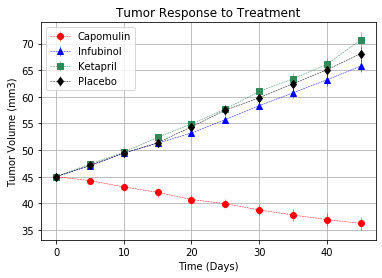

In [5]:
# Generate the Plot (with Error Bars)
# Create the x-axis using the Timepoint data
timepoint = [mouse_clinical['Timepoint'][i] for i in range(0, 10)]
x_axis = timepoint

# Create a variable to store the mean data of each treatment
capomulin_mean = new_tumor_mean['Capomulin']
infubinol_mean = new_tumor_mean['Infubinol']
ketapril_mean = new_tumor_mean['Ketapril']
placebo_mean = new_tumor_mean['Placebo']

# Create a variable to store the standard error data of each treatment
capomulin_sem = new_tumor_sem['Capomulin']
infubinol_sem = new_tumor_sem['Infubinol']
ketapril_sem = new_tumor_sem['Ketapril']
placebo_sem = new_tumor_sem['Placebo']

# Create the error bars
fig, ax = plt.subplots()
ax.errorbar(x_axis, capomulin_mean, capomulin_sem, fmt='o', ls='--', color='red', linewidth=0.5, label='Capomulin')
ax.errorbar(x_axis, infubinol_mean, infubinol_sem, fmt='^', ls='--', color='blue', linewidth=0.5, label='Infubinol')
ax.errorbar(x_axis, ketapril_mean, ketapril_sem, fmt='s', ls='--', color='seagreen', linewidth=0.5, label='Ketapril')
ax.errorbar(x_axis, placebo_mean, placebo_sem, fmt='d', ls='--', color='black', linewidth=0.5, label='Placebo')

# Format the graph

# Set a grid to the plot
ax.grid()

# Label the plot
plt.title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Create and set the legend
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/TumorResponseToTreatment.png")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = drug_timepoint['Metastatic Sites'].mean()

# Convert to DataFrame
meta_mean_df = meta_mean.reset_index()

# Preview DataFrame
meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = drug_timepoint['Metastatic Sites'].sem()

# Convert to DataFrame
meta_sem_df = meta_sem.reset_index()

# Preview DataFrame
meta_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
new_meta_mean = pd.pivot_table(meta_mean_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
new_meta_sem = pd.pivot_table(meta_sem_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
new_meta_mean
# new_meta_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


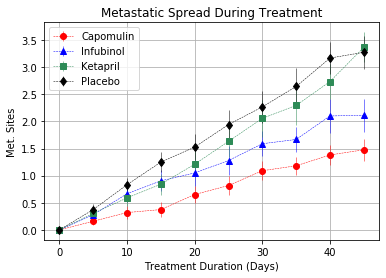

In [10]:
# Generate the Plot (with Error Bars)

# Note the x-axis info is the same from the previous scatter plot, so I will be refering to that one

# Create a variable to store the mean data of each Metastatic Site
capomulin_meta_mean = new_meta_mean['Capomulin']
infubinol_meta_mean = new_meta_mean['Infubinol']
ketapril_meta_mean = new_meta_mean['Ketapril']
placebo_meta_mean = new_meta_mean['Placebo']

# Create a variable to store the standard error data of each Metastatic Site
capomulin_meta_sem = new_meta_sem['Capomulin']
infubinol_meta_sem = new_meta_sem['Infubinol']
ketapril_meta_sem = new_meta_sem['Ketapril']
placebo_meta_sem = new_meta_sem['Placebo']

# Create the error bars
fig, ax = plt.subplots()
ax.errorbar(x_axis, capomulin_meta_mean, capomulin_meta_sem, fmt='o', ls='--', color='red', linewidth=0.5, label='Capomulin')
ax.errorbar(x_axis, infubinol_meta_mean, infubinol_meta_sem, fmt='^', ls='--', color='blue', linewidth=0.5, label='Infubinol')
ax.errorbar(x_axis, ketapril_meta_mean, ketapril_meta_sem, fmt='s', ls='--', color='seagreen', linewidth=0.5, label='Ketapril')
ax.errorbar(x_axis, placebo_meta_mean, placebo_meta_sem, fmt='d', ls='--', color='black', linewidth=0.5, label='Placebo')

# Format the graph

# Set a grid to the plot
ax.grid()

# Label the plot
plt.title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# Create and set the legend
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Make a new grouped variable that also groups Drug and Timepoint
drug_timepoint1 = mouse_clinical.groupby(['Drug', 'Timepoint'])

# Create a new variable that stores all of the count of the new grouped variable
drug_timepoint_count = drug_timepoint1.count()

# Rename Mouse ID to say Mouse Count
# Note: The count is the same for all the columns in the grouped variable so it does not have to be Mouse ID
renamed_group = drug_timepoint_count.rename(columns={"Mouse ID":"Mouse Count"})

# Create a variable that will only look at Mouse Count when grouped with Drug and Timepoint
mouse_count = renamed_group['Mouse Count']

# Convert to DataFrame
mouse_count_df = mouse_count.reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_count = pd.pivot_table(mouse_count_df, values='Mouse Count', index=['Timepoint'], columns=['Drug'])

# Preview the Data Frame
pivot_mouse_count


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


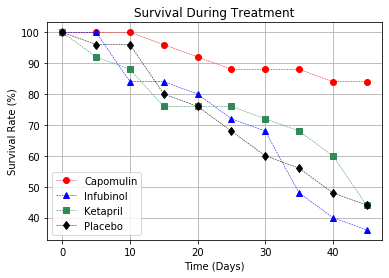

In [13]:
# Generate the Plot (Accounting for percentages)
# Again x-axis is the same from the first scatter plot

# Calculate the survival rates
capomulin_survival = (pivot_mouse_count['Capomulin'] / pivot_mouse_count['Capomulin'][0]) * 100
infubinol_survival = (pivot_mouse_count['Infubinol'] / pivot_mouse_count['Infubinol'][0]) * 100
ketapril_survival = (pivot_mouse_count['Ketapril'] / pivot_mouse_count['Ketapril'][0]) * 100
placebo_survival = (pivot_mouse_count['Placebo'] / pivot_mouse_count['Placebo'][0]) * 100

# Create the error bars
fig, ax = plt.subplots()
ax.errorbar(x_axis, capomulin_survival, fmt='o', ls='--', color='red', linewidth=0.5, label='Capomulin')
ax.errorbar(x_axis, infubinol_survival, fmt='^', ls='--', color='blue', linewidth=0.5, label='Infubinol')
ax.errorbar(x_axis, ketapril_survival, fmt='s', ls='--', color='seagreen', linewidth=0.5, label='Ketapril')
ax.errorbar(x_axis, placebo_survival, fmt='d', ls='--', color='black', linewidth=0.5, label='Placebo')

# Format the graph

# Set a grid to the plot
ax.grid()

# Label the plot
plt.title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")

# Create and set the legend
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

In [14]:
new_tumor_mean['Capomulin'][45]

36.23611379944763

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
# Use the Timepoint numbers as the indicies
# ((new_tumor_mean['Drug Name'][45] - new_tumor_mean['Drug Name'][0]) / new_tumor_mean['Drug Name'][0]) * 100
capomulin_volume_change = ((new_tumor_mean['Capomulin'][45] - new_tumor_mean['Capomulin'][0]) / new_tumor_mean['Capomulin'][0]) * 100
ceftamin_volume_change = ((new_tumor_mean['Ceftamin'][45] - new_tumor_mean['Ceftamin'][0]) / new_tumor_mean['Ceftamin'][0]) * 100
infubinol_volume_change = ((new_tumor_mean['Infubinol'][45] - new_tumor_mean['Infubinol'][0]) / new_tumor_mean['Infubinol'][0]) * 100
ketapril_volume_change = ((new_tumor_mean['Ketapril'][45] - new_tumor_mean['Ketapril'][0]) / new_tumor_mean['Ketapril'][0]) * 100
naftisol_volume_change = ((new_tumor_mean['Naftisol'][45] - new_tumor_mean['Naftisol'][0]) / new_tumor_mean['Naftisol'][0]) * 100
placebo_volume_change = ((new_tumor_mean['Placebo'][45] - new_tumor_mean['Placebo'][0]) / new_tumor_mean['Placebo'][0]) * 100
propriva_volume_change = ((new_tumor_mean['Propriva'][45] - new_tumor_mean['Propriva'][0]) / new_tumor_mean['Propriva'][0]) * 100
ramicane_volume_change = ((new_tumor_mean['Ramicane'][45] - new_tumor_mean['Ramicane'][0]) / new_tumor_mean['Ramicane'][0]) * 100
stelasyn_volume_change = ((new_tumor_mean['Stelasyn'][45] - new_tumor_mean['Stelasyn'][0]) / new_tumor_mean['Stelasyn'][0]) * 100
zoniferol_volume_change = ((new_tumor_mean['Zoniferol'][45] - new_tumor_mean['Zoniferol'][0]) / new_tumor_mean['Zoniferol'][0]) * 100

# Create a dataframe for the volume changes 
total_volume_change = pd.DataFrame({"Capomulin": [capomulin_volume_change],
                                   "Ceftamin": [ceftamin_volume_change],
                                   "Infubinol": [infubinol_volume_change],
                                   "Ketapril": [ketapril_volume_change],
                                   "Naftisol": [naftisol_volume_change],
                                   "Placebo": [placebo_volume_change],
                                   "Propriva": [propriva_volume_change],
                                   "Ramicane": [ramicane_volume_change],
                                   "Stelasyn": [stelasyn_volume_change],
                                   "Zoniferol": [zoniferol_volume_change]})
# Display the data to confirm
total_volume_change

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


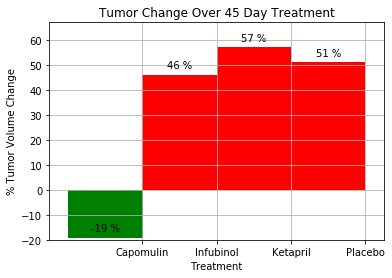

In [22]:
fig, ax = plt.subplots()

# Store all Relevant Percent Changes into a Tuple
percent_tuple = (int(capomulin_volume_change), int(infubinol_volume_change), int(ketapril_volume_change), int(placebo_volume_change))

# Splice the data between passing and failing drugs
# Create a list for the passing drugs and the failing drugs
passing_drugs = []
failing_drugs = []

# Loop through the tuple to splice it between the passing and failing drugs
for i in range(0, 4):
    
    if percent_tuple[i] < 0:
        
        passing_drugs.append(percent_tuple[i])
        
    else:
        
        failing_drugs.append(percent_tuple[i])

# Orient widths. Add labels, tick marks, etc. 
# Create the x-axis
x_axis = np.arange(len(percent_tuple))

# Set the x and y limits
ax.set_xlim(-1.25, len(x_axis)-0.75)
ax.set_ylim(-20, max(percent_tuple)+10)

# Set tick locations
tick_locations = [0, 1, 2, 3]
# tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Add labels
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xlabel("Treatment")
ax.set_ylabel("% Tumor Volume Change")

# Add grid lines
plt.grid()

# Plot the graph
bar_plot = ax.bar(x_axis, percent_tuple, facecolor='red', width=-1.0, align='edge')
bar_plot[0].set_color('g')

# Use functions to label the percentages of changes
def autolabel(rects, ax):
   # Get y-axis height to calculate label position from.
   (y_bottom, y_top) = ax.get_ylim()
   y_height = y_top - y_bottom
   for rect in rects:
       height = rect.get_height()
       if height != 0 :
           # Fraction of axis height taken up by this rectangle
           p_height = (height / y_height)
           # If we can fit the label above the column, do that;
           # otherwise, put it inside the column.
           if p_height > 0.95: # arbitrary; 95% looked good to me.
               label_position = height - (y_height * 0.05)
           else:
               label_position = height + (y_height * 0.02)
           ax.text(rect.get_x() + rect.get_width()/2., label_position,
                   '%d %%'%(height),
                   ha='center', va='bottom')
autolabel(bar_plot, ax)

# Call functions to implement the function calls


# Save the Figure
plt.savefig("../Images/TumorChangeOver45DayTreatment.png")

# Show the Figure
fig.show()

Analysis:

1: The tumor volume decreases over time when treated with Capomulin, but the tumor volume increases when treated with Infubinol, Ketapril, and Placebo.

2: Capomulin has the best survival rate in mice who were treated with the drug.

3: Overall Capomulin appears to be the best drug, out of the four choices, for the tumors to decrease in size and save the person afflicted with this cancer.